## big mart sales predicition

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#For linear Regression using the sklearn package
import scipy.stats as stats
import sklearn

In [4]:
import os
os.chdir('C:\\Users\\MANDY\\Desktop\\dataset')

In [87]:
train=pd.read_csv('bigmart_train.csv')
test=pd.read_csv('bigmart_test.csv')
# trin=sns.load_dataset('bigmart_tr

In [88]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [89]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [90]:
len(train)

8523

In [91]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [92]:
len(test)

5681

In [93]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [94]:
len(train)-len(test)

2842

In [95]:
print(train.dtypes)


print(test.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [96]:
train['Item_Weight'].isnull().sum()

1463

In [97]:
train['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [98]:
train['Item_Weight'].mean()

12.857645184136183

In [99]:
train['Item_Weight'].median()

12.6

In [100]:
train['Item_Weight'].mode()

0    12.15
dtype: float64

In [101]:
train['Item_Weight'].replace(" ",train['Item_Weight'].mean()).head(20)

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
Name: Item_Weight, dtype: float64

In [102]:
train.corr().describe

<bound method NDFrame.describe of                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  >

In [103]:

train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [104]:
np.log(train.Item_Weight).describe()

count    7060.000000
mean        2.481245
std         0.393703
min         1.516226
25%         2.171764
50%         2.533697
75%         2.824351
max         3.061052
Name: Item_Weight, dtype: float64

In [105]:
train.Outlet_Size.describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

### feature engineering start here
##### concitanation of both test and train data set in train 8523 columns and 13 rows in the test data set i have  5681 rows and  12 columns after concitnate i got 14204 rows and 13 columns

In [106]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [107]:
# remove null value at one time it will help me to remove null value at one time
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [108]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [109]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3496
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

##### This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

In [110]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

#### missing value imputatoin

In [111]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

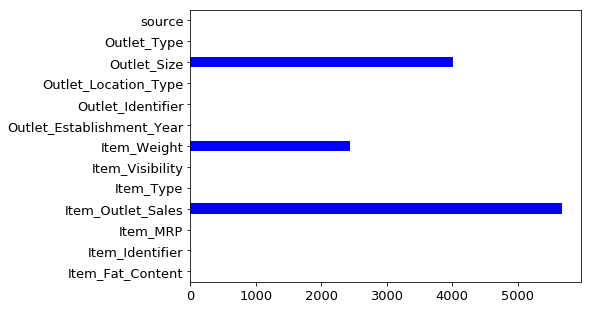

In [28]:
#Plotting the missing value information
miss = data.isnull().sum()##
miss.plot(kind='barh', figsize=(7,5), color="blue", fontsize=13)
plt.show()

In [112]:
#Getting the percentage of missing values
round(data.isnull().sum()/len(data.index)*100,3)

Item_Fat_Content              0.000
Item_Identifier               0.000
Item_MRP                      0.000
Item_Outlet_Sales            39.996
Item_Type                     0.000
Item_Visibility               0.000
Item_Weight                  17.171
Outlet_Establishment_Year     0.000
Outlet_Identifier             0.000
Outlet_Location_Type          0.000
Outlet_Size                  28.274
Outlet_Type                   0.000
source                        0.000
dtype: float64

In [113]:
#Only the variables that contains the missing values
x = round((data.isnull()).sum()/len(data.index)*100,3)
x[x>0]

Item_Outlet_Sales    39.996
Item_Weight          17.171
Outlet_Size          28.274
dtype: float64

#### mean or median imputation

In [114]:
#Making a copy of the data
data1 = data.copy()

In [115]:
#Mean of all the variables
data1.mean()

Item_MRP                      141.004977
Item_Outlet_Sales            2181.288914
Item_Visibility                 0.065953
Item_Weight                    12.792854
Outlet_Establishment_Year    1997.830681
dtype: float64

In [116]:
#Imputing the missing values in the variable totChol using the mean
#Mean of Item_Outlet_sales
data['Item_Weight']=data['Item_Weight'].fillna((data['Item_Weight'].mean()))

In [117]:
data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].fillna((data['Item_Outlet_Sales'].mean()))

In [118]:
data['Outlet_Size']=data['Outlet_Size'].fillna((data['Outlet_Size'].mode()[0]))

In [119]:
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

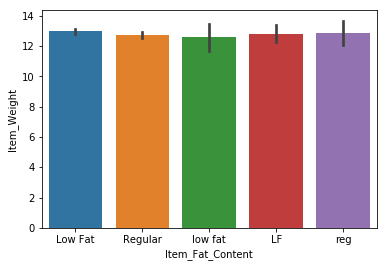

In [38]:
sns.barplot(x='Item_Fat_Content',y='Item_Weight',data=train)

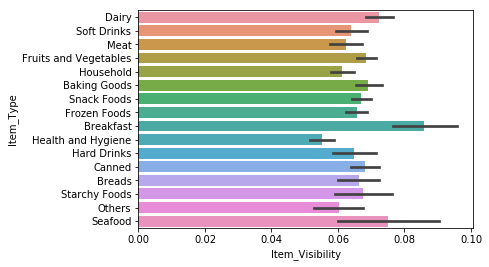

In [39]:
sns.barplot(x='Item_Visibility',y='Item_Type',data=train)

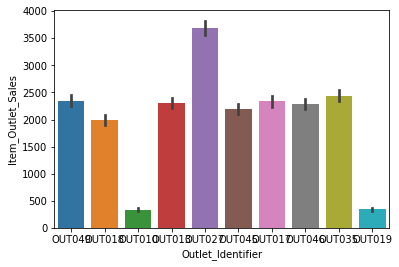

In [40]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

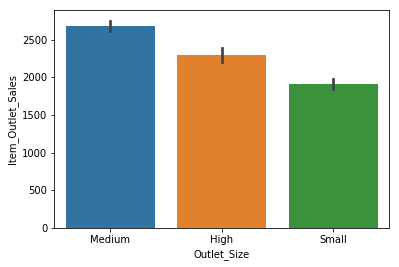

In [41]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

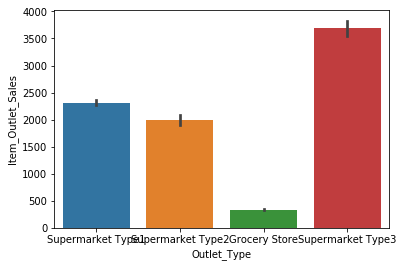

In [42]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

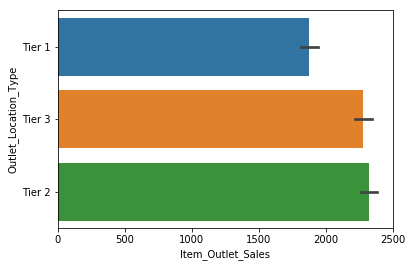

In [43]:
sns.barplot(x='Item_Outlet_Sales',y='Outlet_Location_Type',data=train)

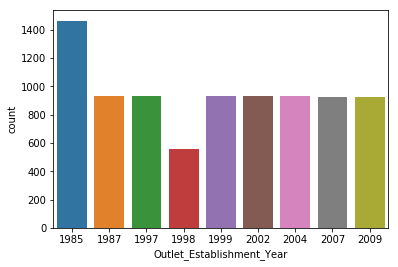

In [44]:
sns.countplot(x='Outlet_Establishment_Year',data=train)

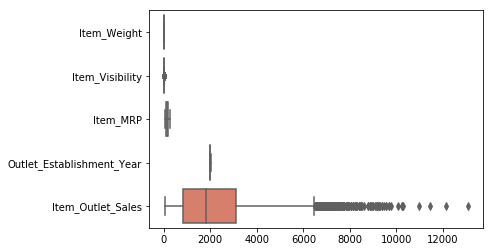

In [45]:
#Can do entire dataframe with orient='h'
sns.boxplot(data=train,palette='coolwarm',orient='h')

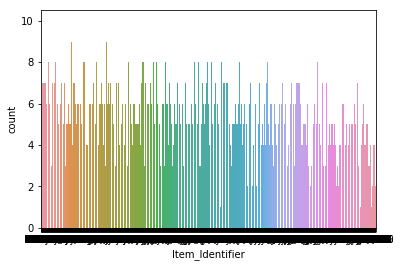

In [46]:

sns.countplot(x='Item_Identifier',data=train)

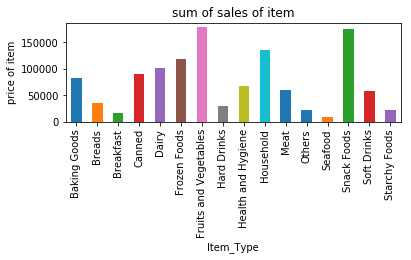

In [47]:
var = train.groupby('Item_Type').Item_MRP.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Item_type')
ax1.set_ylabel('price of item')
ax1.set_title("sum of sales of item")
var.plot(kind='bar')

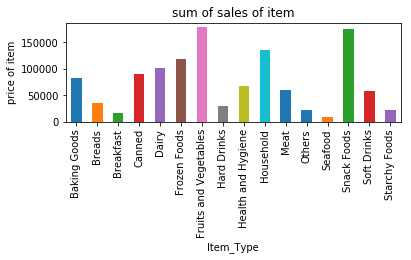

In [48]:
var = train.groupby('Item_Type').Item_MRP.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Item_type')
ax1.set_ylabel('price of item')
ax1.set_title("sum of sales of item")
var.plot(kind='bar')

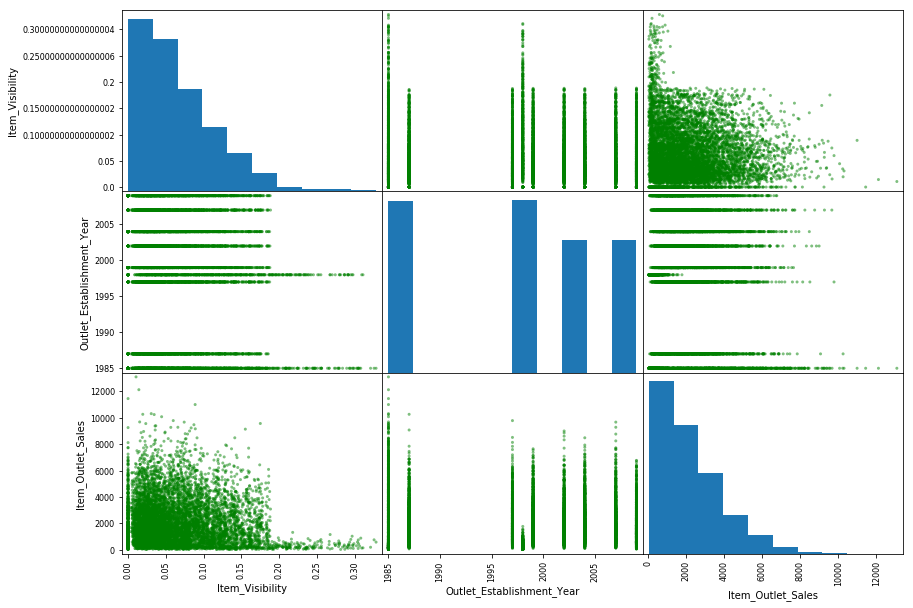

In [49]:
#Pairwise Scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(train.drop(["Item_Weight","Item_MRP"],axis=1), alpha=0.5, figsize=(14, 10),color='g',
               diagonal='hist')
plt.show()

In [50]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

### model building